<a href="https://colab.research.google.com/github/AyushBhatt99/Short-term-Load-Forecasting/blob/main/linerreg_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

r2_score: 0.4618536117313038
rmse: 140.70926139539176
Mean of all net demands given in last column: 1182.868647232428
error_percent: 11.89559480882437
Mean Absolute Error: 115.14
Accuracy: 90.04 %.


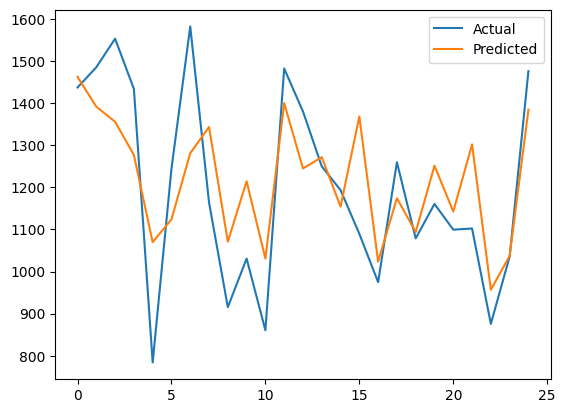

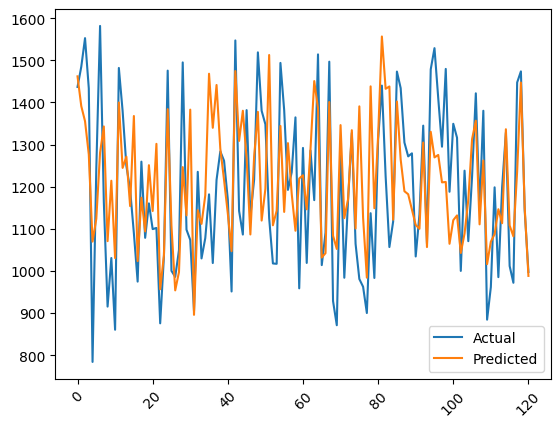

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('load.csv')
data= df.copy()
# data

df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']])
df

df = df.dropna()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# print(X)
# print(y);

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

y_test

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)

y_pred

# print(y_test)

r2_score(y_test,y_pred)
print('r2_score:',r2_score(y_test,y_pred))

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('rmse:',rmse)

df['net_demand'].mean()
print('Mean of all net demands given in last column:',df['net_demand'].mean())

error_percent = (rmse/df['net_demand'].mean())*100
print('error_percent:',error_percent)

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.plot(y_test[0:25], label='Actual')
plt.plot(y_pred[0:25], label='Predicted')
plt.legend()
plt.show()

plt.plot(y_test[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [3]:
X_train[0]

array([0.2519, 0.6691, 0.206 , 0.3332, 0.    ])

In [4]:
import pandas as pd
import requests

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Process the weather data and create a DataFrame
    # Example: weather_df = process_weather_data(weather_data)

    # Now you can continue with your analysis using weather_df
    print("Weather data fetched successfully.")
else:
    print('Weather data fetch failed.')


Weather data fetched successfully.


In [5]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    datetime_str = first_forecast['dt_txt']
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity']/1000
    precipitation = 0.0597976  # Assuming precipitation data is not available in the response
    wind = first_forecast['weather'][0]['description']
    wind_speed = first_forecast['wind']['speed']*3.66

    # Determine if it's a holiday (Sunday or Monday)
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Print the extracted information
    print(f'Date Time: {datetime_str}')
    print(f'Temperature: {temperature}')
    print(f'Humidity: {humidity}')
    print(f'Precipitation: {precipitation}')  # Assuming precipitation data is not available

    print(f'Wind Speed: {wind_speed} ')
    print(f'Holiday: {holiday}')  # Print holiday value
else:
    print('Weather data fetch failed.')


Date Time: 2024-04-23 21:00:00
Temperature: 29.58
Humidity: 0.044
Precipitation: 0.0597976
Wind Speed: 8.6742 
Holiday: 0


In [6]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load your trained linear regression model
# Assuming you have already trained and saved your model
# Load the model using appropriate libraries (e.g., joblib for saving/loading models)

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    datetime_str = first_forecast['dt_txt']
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity'] / 1000  # Scale humidity to 0-1
    precipitation = 0.017  # Assuming precipitation data is not available in the response
    wind_speed = first_forecast['wind']['speed']* 3.66  # Convert wind speed to km/h
    # Assuming no holiday information is available from the weather API
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0



    # Reshape input data to match the number of features expected by the scaler
    input_data = np.array([[temperature,humidity, precipitation, wind_speed, holiday]])

    # Fit MinMaxScaler and transform input data
    scaler = MinMaxScaler()
    # Assuming X_train contains your training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Use the same scaler to transform the input data
    input_data_scaled = scaler.transform(input_data)

    # Use your trained linear regression model to predict net demand
    # Assuming you have already loaded your trained model as 'regressor'
    net_demand_prediction = regressor.predict(input_data_scaled)

    # Display or use the predicted net demand value
    print("Predicted Net Demand:", net_demand_prediction)
else:
    print('Weather data fetch failed.')
#     # Define the scaling factor
# # Define the scaling factors
# min_demand = 900
# max_demand = 1500

# # Use your trained linear regression model to predict net demand
# # Assuming you have already loaded your trained model as 'regressor'
# net_demand_prediction = regressor.predict(input_data_scaled)

# # Scale the predicted net demand values to the desired range
# scaled_net_demand_prediction = (net_demand_prediction - net_demand_prediction.min()) * (max_demand - min_demand) / (net_demand_prediction.max() - net_demand_prediction.min()) + min_demand

# # Display or use the scaled predicted net demand values
# print("Scaled Predicted Net Demand:", scaled_net_demand_prediction)



Predicted Net Demand: [27989.7129]
